In [1]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

## 1. Problem description

Let P be a matrix with nb_date rows and nb_site columns
that encodes in P[i,t] the production of the site i at time t.

Let A[t] be a vector with nb_date. 

We're looking for a vector x of length nb_site, such that

* the variance of p is minimal
* p[t] = x[0]*P[t,0] + ... + x[1]*P[t,nb_site-1] >= A[t] for all t
* x[i] >= 0

The code below generates some random data and solves the correponding problem.

## 2. Solution with some random data

### a. Generate random data 
There are three sites whos production are sinus-like plus a noise

In [34]:
nb_date=360
nb_site=3
P = matrix(np.random.uniform(low=0., high=1., size=nb_date*nb_site), 
           (nb_date,nb_site))
for i in range(nb_site):
    T = np.arange(nb_date)+nb_date*(i/nb_site)
    P[:,i] = nb_site + P[:,i] + matrix(np.sin(2*np.pi*T/nb_date),(nb_date,1))

A = matrix(np.random.uniform(low=5., high=6., size=nb_date), 
           (nb_date,1))

### b. Solution

In [34]:
## Define the optim problem
## Solves min x'Q x  
## with P x >= A
##     x[i] >= 0
## NB: the variance of P.x = x'Q x 
## with Q = covariance of P


Q = matrix(np.cov(np.transpose(np.array(P))))
p = matrix(np.zeros(nb_site))

## inequalities
G = matrix([-P, -matrix(np.eye(nb_site))])
h = matrix([-A,-matrix(np.zeros((nb_site,1)))])

sol=solvers.qp(Q,p,G,h)
x=sol['x']
print(x)

     pcost       dcost       gap    pres   dres
 0:  3.3286e-02  6.0377e+01  1e+03  4e-01  4e+03
 1:  6.1697e-02 -2.0813e+01  2e+01  5e-03  6e+01
 2:  6.2084e-02 -1.6947e-01  2e-01  5e-05  6e-01
 3:  5.4780e-02  3.4047e-02  2e-02  2e-16  3e-16
 4:  4.7883e-02  3.7892e-02  1e-02  1e-16  1e-16
 5:  4.8836e-02  3.9374e-02  9e-03  1e-16  2e-16
 6:  4.8869e-02  4.6029e-02  3e-03  1e-16  9e-17
 7:  4.7563e-02  4.7508e-02  6e-05  1e-16  1e-16
 8:  4.7550e-02  4.7549e-02  6e-07  1e-16  5e-17
 9:  4.7550e-02  4.7550e-02  6e-09  1e-16  1e-16
Optimal solution found.
[ 6.32e-01]
[ 5.89e-01]
[ 6.56e-01]



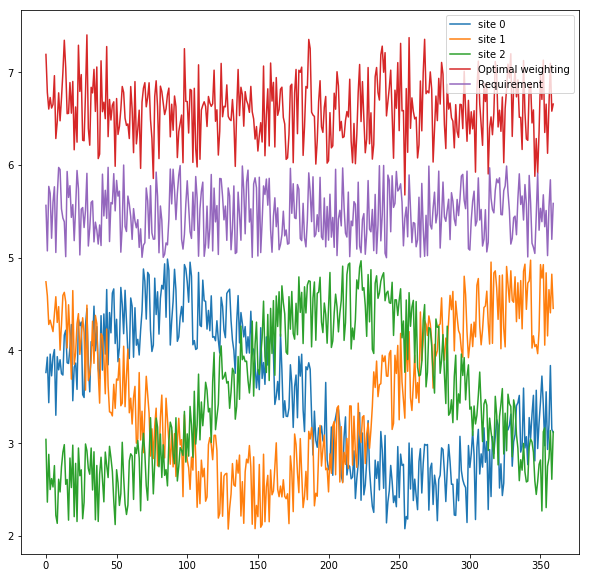

In [33]:
plt.figure(figsize=(10,10))
for i in range(nb_site):
    plt.plot(np.array(P[:,i]), label="production of site "+str(i))

plt.plot(np.array(P).dot(np.array(x)),label="Optimal weighting")
plt.plot(A, label="Requirement")
plt.legend()

### Remarks
* The solution looks a bit silly, the average requirement is around 5,
and with the optimal weights, the actual production is around 6.5